<a href="https://colab.research.google.com/github/nkumbh/100-days-of-code-youtube/blob/main/Linear_Regression_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning -  Linear Regression in Python
<a id="top"></a>

Notes on implementing Linear Regression in python.

### 1. [Data Analysis](#0)

### 2. [Simple Linear Regression](#0)
* [`Gradient Descent` Python Implementation](#1)
* [`Scipy` Implementation](#2)
* [`Scikit-Learn` Implementation](#3)
* [`Statsmodel` Implementation](#4)
* [Multi-step visual of Gradient Descent](#5)
* [Animating the Gradient Descent](#6)  

### 3. [Multi Linear Regression](#7)
* [`Gradient Descent` Python Implementation](#8)
* [`Scikit-Learn` Implementation](#9)
* [Solving with `Normal Equation`](#10)
* [`Scipy` Implementation](#11)
* [`Statsmodel` Implementation](#12)

Importing needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading our housing dataset
We will load our data on house sales in King County to predict house prices using simple (one input) linear regression

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/kc_house_data.csv')

In [ ]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


__We want to be able to predict `Y` which is our price variable.__

In [ ]:
Y = dataset[['price']]

In [ ]:
X = dataset.drop(['price', 'id', 'date'],  axis=1)

In [ ]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<a id = '0'></a>
# 1. Data Analysis
[Top](#top)

## Basic data discovery and analysis with `info`, `describe` and `head`

using pandas `.info()` we see we have 18 columns and 21613 records. Pretty much all the features given are already in numeric format.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [ ]:
#list our columns
columns = X.columns
columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#show first 5 records
X

NameError: ignored

__Compute correlation between variables and our predictor variable__

In [ ]:
dataset = dataset.drop(['id', 'date'], axis=1)

In [ ]:
dataset.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [ ]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


__We can even visualize the table above__

<ipython-input-6-550e81e19dfd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

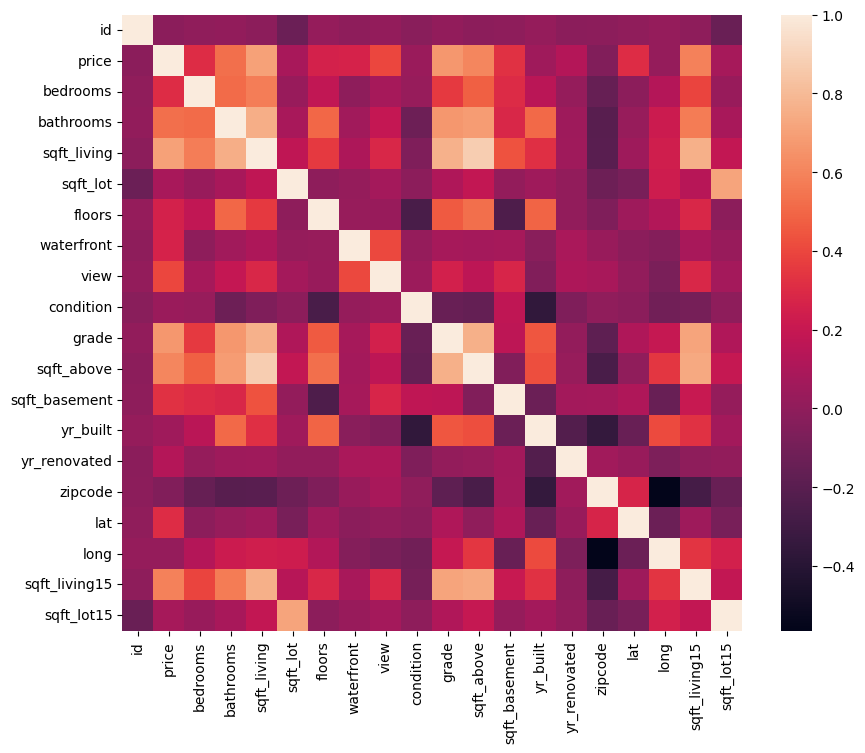

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr())

<a id="0"></a>
# <font color="red">Simple </font>Linear Regression

We will start with __Simple Linear Regression__ since it is easier to understand and visualize before moving to __Multiple Linear Regression__. Though, the conecpts overall are similar and the libraries we will be using are actually designed to handle both wihtout distinction. Simple Linear Regression is easier to plot and visualize so we will start with that.

It is __Simple Linear Regression__ when we have one dependent variable (feature) and one independent variable. Here we will pick `sqft_living` as our independent variable `x`.

Our goal is to estimate $\hat{y} = x {\theta_1} + \theta_0$, where $\theta_1$ is our coefficient and $\theta_0$ is our `Y` intercept. To estimate $\hat{y}$ we need to find a function such as $\hat{y} = h(x) = x {\theta_1} + \theta_0$

__We first start by creating our `x` and `y` variables. Then plotting to gain an intuition on how the data looks like.__

In [ ]:
x = X[['sqft_living']]
y = Y

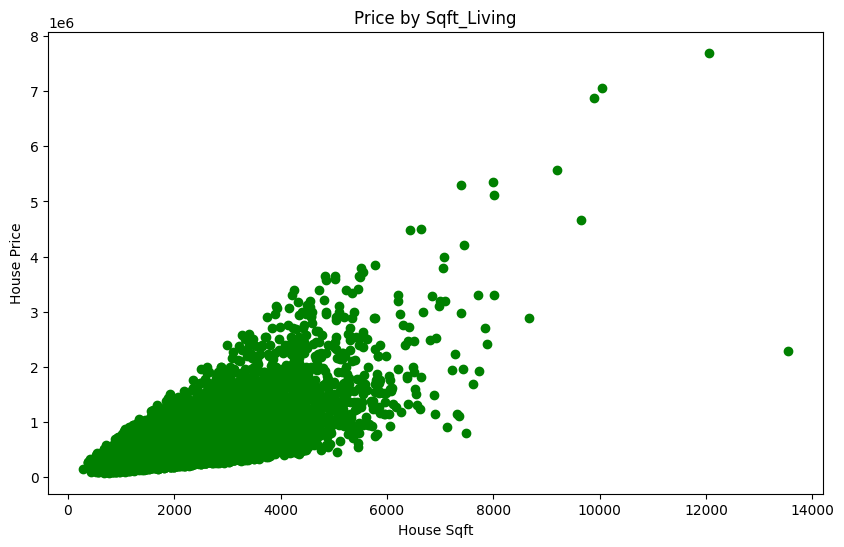

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('House Sqft')
plt.ylabel('House Price')
plt.title('Price by Sqft_Living')
plt.scatter(x,y, marker='o', color='g')

## 3. Manual Method: Compute Slope and Intercept using a Formula (Gradient = 0)

## Slope  $a = \frac{\sum (x_i-\bar{x})(y_i-\bar{Y})}{\sum (x_i-\bar{x})^2}$

## Intercept $b = \bar{y}-a\bar{x}$


In [ ]:
def slr(X, Y):
    mean_x = X.mean()
    mean_y = Y.mean()

    delta_x = X - mean_x
    delta_y = Y - mean_y

    slope = (delta_x * delta_y).sum()/(delta_x**2).sum()
    intercept = mean_y - slope*mean_x

    return (slope, intercept)

In [ ]:
xf = x.values.reshape(-1,1)
yf = y.values.reshape(-1,1)

slope, intercept = slr(xf, yf)
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 280.6235678974483 and Intercept = -43580.74309447408
y = x(280.6235678974483) + -43580.74309447408


<a id='3'></a>
## 5. Implement using Scikit-Learn

In [ ]:
xsl = x.values.reshape(-1,1)
ysl = y.values.reshape(-1,1)
xsl = np.concatenate((np.ones(len(xsl)).reshape(-1,1), xsl), axis=1)

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(xsl[:,1].reshape(-1,1), ysl.reshape(-1,1))
y_hat = slr.predict(xsl[:,1].reshape(-1,1))

print('theta[0] = ', slr.intercept_)
print('theta[1] = ', slr.coef_)

thetas = np.array((slr.intercept_, slr.coef_)).squeeze()

theta[0] =  [-43580.74309447]
theta[1] =  [[280.6235679]]


<ipython-input-18-00b22a709aea>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  thetas = np.array((slr.intercept_, slr.coef_)).squeeze()


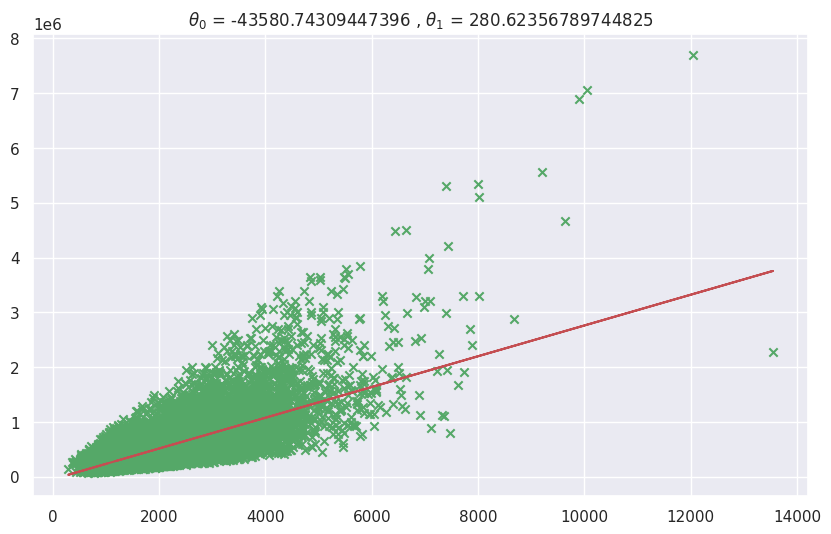

In [ ]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsl[:,1],y, marker='x', color='g')
plt.plot(xsl[:,1], np.dot(xsl, thetas), 'r')

<a id='7'></a>
# <font color="Red">Multiple</font> Linear Regression
[Top](#top)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('/content/drive/MyDrive/dataset/kc_house_data.csv')
Y = dataset[['price']]
X = dataset.drop(['price', 'id', 'date'],  axis=1)

In [ ]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Feature Normalization**

In [ ]:
x = X.values
y = Y.values

In [ ]:
def featureNormalize(x_m):
    mu = np.zeros((1,x_m.shape[1]))
    sigma = np.zeros((1,x_m.shape[1]))
    x_norm = x_m.astype(float)

    for i in range(0,len(mu)+1):
        mu[:,i] = x_m[:,i].mean()
        sigma[:,i] = x_m[:,i].std()
        x_norm[:,i] = (x_m[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

**Normalized**

In [ ]:
x_norm, mu, sigma = featureNormalize(x)
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)

In [ ]:
def computeCost_m(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

<a id='9'></a>
## Multi-variable Regression with Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

mlr = LinearRegression()
sc_x = StandardScaler()
X_new = sc_x.fit_transform(x)

In [ ]:
mlr.fit(X_new, Y)
y_hat = mlr.predict(X_new)

In [ ]:
mlr.score(X_new, Y)

0.6997471890109157

In [ ]:
mlr.intercept_

In [ ]:
mlr.coef_

In [ ]:
from sklearn import linear_model
df = pd.read_csv('/content/drive/MyDrive/dataset/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

ValueError: ignored

In [ ]:
df.bedrooms.median()

4.0

In [ ]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

221323.00186540396

In [ ]:
## Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [ ]:
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
d = pd.read_csv("/content/drive/MyDrive/dataset/hiring.csv")
d


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
d.experience = d.experience.fillna("zero")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
from word2number import w2n
d.experience = d.experience.apply(w2n.word_to_num)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5567 sha256=fa91a2538bb8325d49d947cfeb88f9b1ea2f8ccd71117542965d26b39f5846b3
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
import math
median_test_score = math.floor(d['test_score(out of 10)'].mean())
median_test_score

7

In [ ]:
d['test_score(out of 10)'] = d['test_score(out of 10)'].fillna(median_test_score)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(d[['experience','test_score(out of 10)','interview_score(out of 10)']],d['salary($)'])

LinearRegression()

In [ ]:
## 2 yr experience, 9 test score, 6 interview score
reg.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [ ]:
w, b, _ = gradient_descent(x,y)
print("W calculated: {:.2f} and b calculated: {:.2f}".format(w, b))

TypeError: ignored